In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import re

# For displaying charts inline
%matplotlib inline


In [2]:
import pandas as pd

df = pd.read_csv("blogtext.csv") 

In [3]:
print(df.shape)

(681284, 7)


In [4]:
print(df.columns)

Index(['id', 'gender', 'age', 'topic', 'sign', 'date', 'text'], dtype='object')


In [5]:
df['text'].head()

0               Info has been found (+/- 100 pages,...
1               These are the team members:   Drewe...
2               In het kader van kernfusie op aarde...
3                     testing!!!  testing!!!          
4                 Thanks to Yahoo!'s Toolbar I can ...
Name: text, dtype: object

In [6]:
# Strip whitespace from text column
df['text'] = df['text'].astype(str).str.strip()

In [7]:
# Drop rows with missing text
df.dropna(subset=['text'], inplace=True)

In [8]:
# Word & Character Counts
df['word_count'] = df['text'].apply(lambda x: len(x.split()))
df['char_count'] = df['text'].apply(len)

# TextBlob Polarity
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Sentiment Category
def get_sentiment(p):
    if p > 0.1:
        return 'Positive'
    elif p < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment'] = df['polarity'].apply(get_sentiment)


In [9]:
df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))
df['char_count'] = df['text'].apply(lambda x: len(str(x)))
df[['word_count', 'char_count']].describe()


,word_count,char_count
count,681284.000000,681284.000000
mean,200.786742,1100.830213
std,415.160622,2328.288634
min,0.000000,0.000000
25%,37.000000,210.000000
50%,112.000000,617.000000
75%,255.000000,1387.000000
max,131169.000000,790110.000000


C:\Users\V SRAVANI\AppData\Local\Temp\ipykernel_11168\2357883807.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sentiment', y='word_count', data=df, estimator='mean', palette='coolwarm')


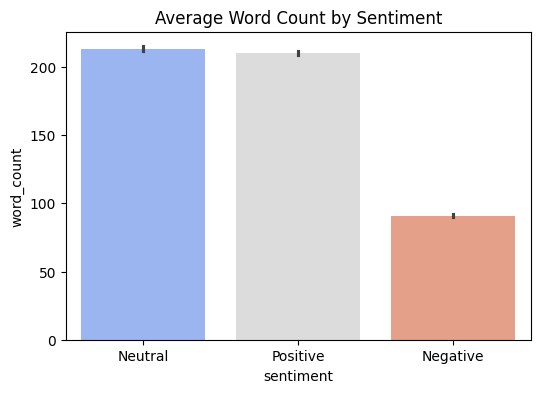

In [10]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sentiment', y='word_count', data=df, estimator='mean', palette='coolwarm')
plt.title('Average Word Count by Sentiment')
plt.show()


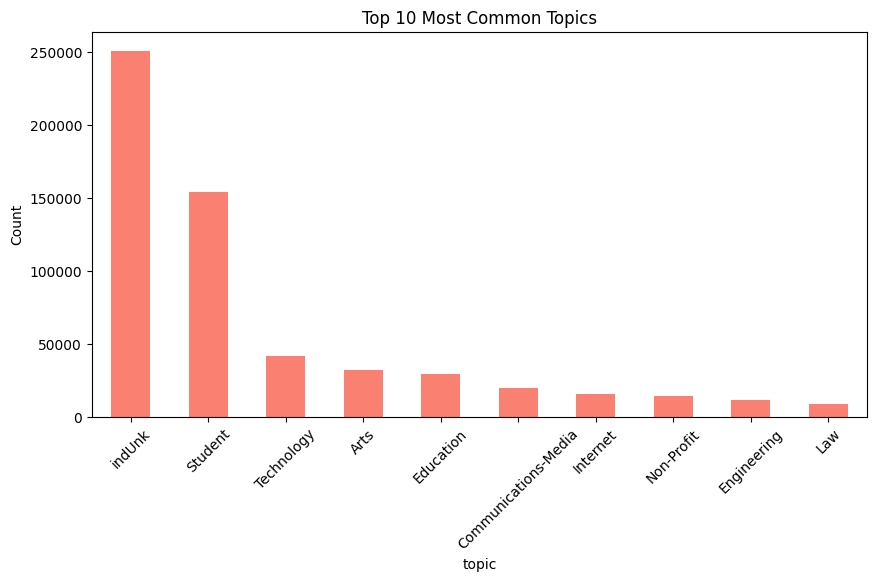

In [11]:
plt.figure(figsize=(10, 5))
df['topic'].value_counts().head(10).plot(kind='bar', color='salmon')
plt.title('Top 10 Most Common Topics')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


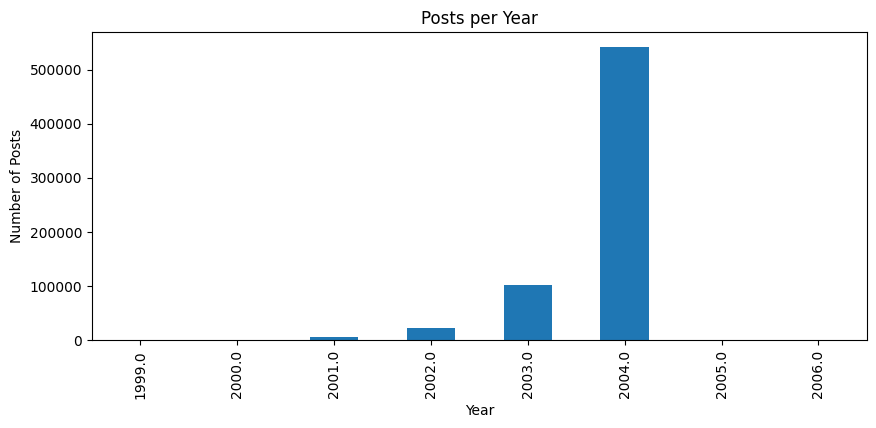

In [12]:
# Convert date string to datetime
df['date_parsed'] = pd.to_datetime(df['date'], errors='coerce')
df['year'] = df['date_parsed'].dt.year

plt.figure(figsize=(10,4))
df['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Posts per Year')
plt.xlabel('Year')
plt.ylabel('Number of Posts')
plt.show()


In [13]:
import re

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = re.sub(r'\s+', ' ', text)  # remove extra whitespace
    text = text.strip()
    text = text.lower()
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

def vader_sentiment(text):
    score = sia.polarity_scores(text)
    compound = score['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(vader_sentiment)


[nltk_data] Downloading package vader_lexicon to C:\Users\V
[nltk_data]     SRAVANI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
df[['id', 'text', 'sentiment']].to_csv('sentiment_output.csv', index=False)


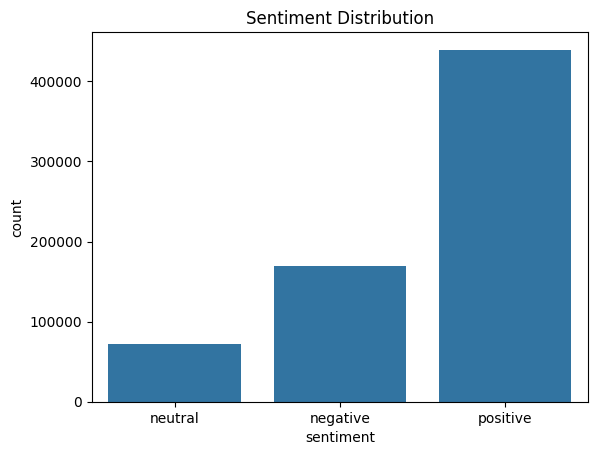

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df, x='sentiment')
plt.title('Sentiment Distribution')
plt.show()


In [17]:
gender_sentiment = df.groupby(['gender', 'sentiment']).size().unstack().fillna(0)

# Normalize to get % distribution
gender_sentiment_percent = gender_sentiment.div(gender_sentiment.sum(axis=1), axis=0) * 100

print(gender_sentiment)
print(gender_sentiment_percent)

sentiment  negative  neutral  positive
gender                                
female        81490    32786    221815
male          88389    39124    217680
sentiment   negative    neutral   positive
gender                                    
female     24.246409   9.755096  65.998494
male       25.605676  11.333949  63.060375


In [18]:
topic_sentiment = df.groupby(['topic', 'sentiment']).size().unstack().fillna(0)
topic_sentiment_percent = topic_sentiment.div(topic_sentiment.sum(axis=1), axis=0) * 100

print(topic_sentiment_percent)


sentiment                 negative    neutral   positive
topic                                                   
Accounting               20.407098   8.089770  71.503132
Advertising              24.144568   9.195894  66.659538
Agriculture              22.914980  10.526316  66.558704
Architecture             21.123321  22.771673  56.105006
Arts                     25.600173   9.957164  64.442664
Automotive               27.974277  15.032154  56.993569
Banking                  26.599160  13.114349  60.286490
Biotech                  27.484333  10.698299  61.817368
BusinessServices         24.177778  10.866667  64.955556
Chemicals                26.756619  17.871690  55.371690
Communications-Media     24.309831  11.395233  64.294935
Construction             21.043001  16.376944  62.580055
Consulting               23.234391  11.736609  65.029000
Education                22.424324  10.265582  67.310093
Engineering              21.239166  12.777825  65.983009
Environment              24.493

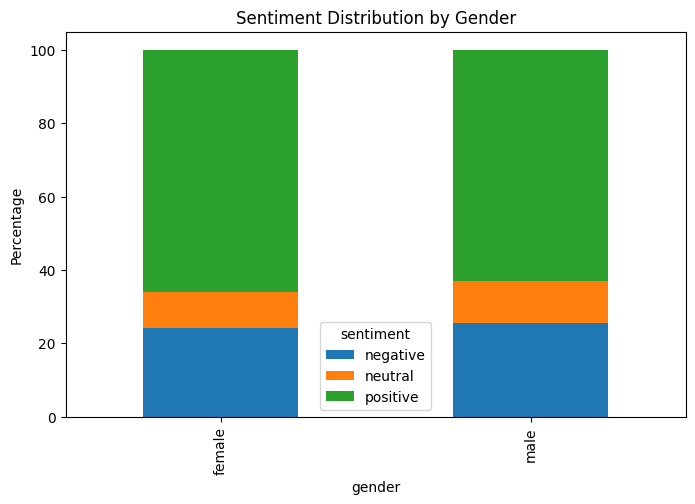

In [19]:
import matplotlib.pyplot as plt

# Example: Gender vs Sentiment
gender_sentiment_percent.plot(kind='bar', stacked=True, figsize=(8,5))
plt.title("Sentiment Distribution by Gender")
plt.ylabel("Percentage")
plt.show()


C:\Users\V SRAVANI\AppData\Local\Temp\ipykernel_11168\3615132825.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  length_sentiment = df.groupby(['length_category', 'sentiment']).size().unstack().fillna(0)


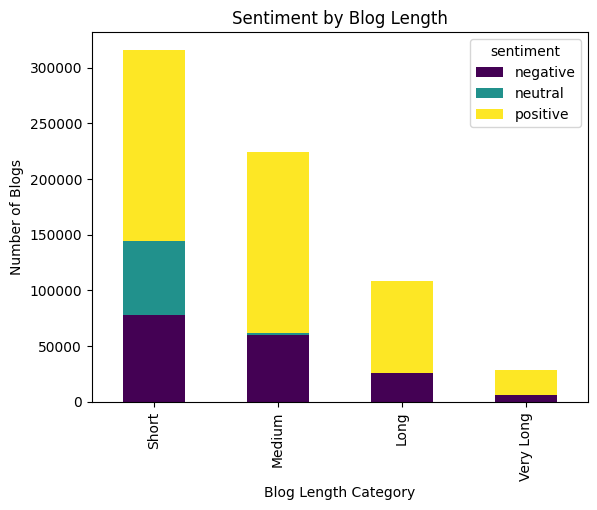

In [20]:
df['length'] = df['text'].apply(lambda x: len(x.split()))
df['length_category'] = pd.cut(df['length'], bins=[0, 100, 300, 700, 2000], labels=['Short', 'Medium', 'Long', 'Very Long'])

length_sentiment = df.groupby(['length_category', 'sentiment']).size().unstack().fillna(0)
length_sentiment.plot(kind='bar', stacked=True, colormap='viridis')
plt.title("Sentiment by Blog Length")
plt.ylabel("Number of Blogs")
plt.xlabel("Blog Length Category")
plt.show()


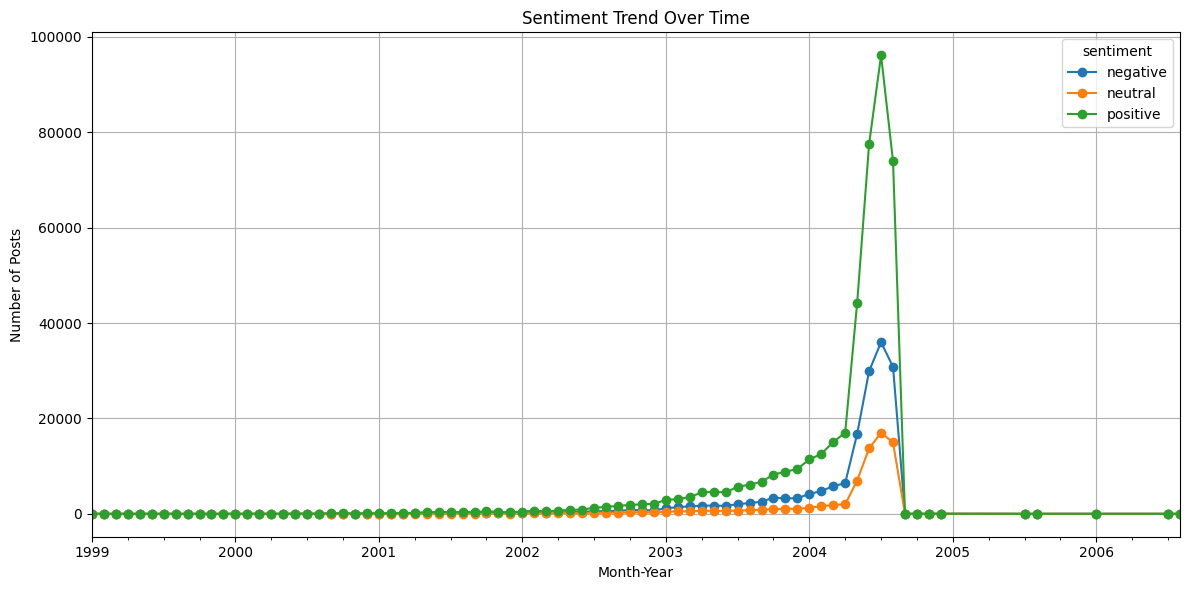

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert date column to datetime
df['parsed_date'] = pd.to_datetime(df['date'], errors='coerce')

# Step 2: Create a month-year column
df['month_year'] = df['parsed_date'].dt.to_period('M')

# Step 3: Group by month and sentiment, then pivot to wide format
sentiment_by_time = df.groupby(['month_year', 'sentiment']).size().unstack().fillna(0)

# Step 4: Plot


sentiment_by_time.plot(kind='line', marker='o', figsize=(12, 6), title="Sentiment Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Posts")
plt.grid(True)
plt.tight_layout()
plt.show()
